#IVP Lab assignment 5
#By IIT2019161

## Q1

###Using RGB

Image before histogram equalisation


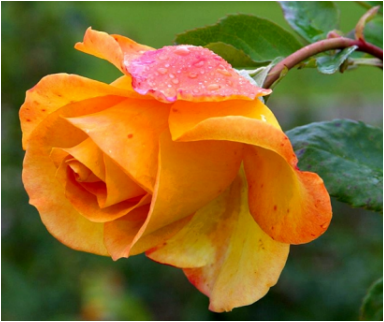

Image after histogram equalisation


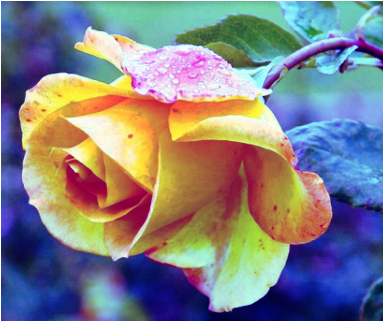

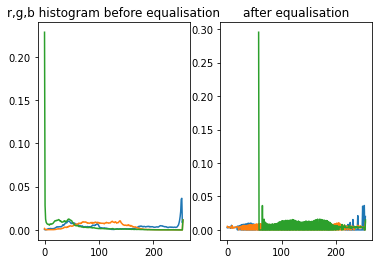

In [239]:
import PIL
from PIL import Image
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

urllib.request.urlretrieve('https://raw.githubusercontent.com/smcri/IVP2021_IIITA/main/ivp5_images/input1.PNG', 'input1.PNG')

image = Image.open('input1.PNG')
res = res= PIL.Image.new(image.mode, image.size)

r = []
g = []
b = []

for x in range(image.height):                    #Loop to get matrices of R,G,B values
  tempr = []
  tempg = []
  tempb = []
  for y in range(image.width):
    tempr.append(image.getpixel((y,x))[0])
    tempg.append(image.getpixel((y,x))[1])
    tempb.append(image.getpixel((y,x))[2])
  r.append(tempr)
  g.append(tempg)
  b.append(tempb)


r_hist = np.histogram(np.array(r).flatten(), 256, density=True)    #Creating histograms of mattrices after flattening arrays
g_hist = np.histogram(np.array(g).flatten(), 256, density=True)
b_hist = np.histogram(np.array(b).flatten(), 256, density=True)


figure, axis = plt.subplots(1, 2)                               # creating a 1x2 subplot
axis[0].plot(r_hist[1][:-1],r_hist[0])                          #plotting r
axis[0].plot(g_hist[1][:-1],g_hist[0])                          #plotting g
axis[0].plot(b_hist[1][:-1],b_hist[0])                          #plotting b
axis[0].set_title('r,g,b histogram before equalisation')

rcdf = r_hist[0].cumsum()                         #calculating cumulative sum
gcdf = g_hist[0].cumsum()
bcdf = b_hist[0].cumsum()

rcdf = 255*rcdf/(rcdf[-1])    #Normalisation(negative index gives last value of array i.e total cumulative sum)
gcdf = 255*gcdf/(gcdf[-1])
bcdf = 255*bcdf/(bcdf[-1])

r_eq = np.interp(np.array(r).flatten(), r_hist[1][:-1], rcdf)        #storing equalised values after interpolation between histogram and cdf
g_eq = np.interp(np.array(g).flatten(), g_hist[1][:-1], gcdf)
b_eq = np.interp(np.array(b).flatten(), b_hist[1][:-1], bcdf)

r_eq = r_eq.reshape((image.height,image.width))                     #reshaping array accrding to image dimensions
g_eq = g_eq.reshape((image.height,image.width))
b_eq = b_eq.reshape((image.height,image.width))

r_eq_hist = np.histogram(np.array(r_eq).flatten(), 256, density=True)  #plotting r after equalisation
g_eq_hist = np.histogram(np.array(g_eq).flatten(), 256, density=True)  #plotting g after equalisation
b_eq_hist = np.histogram(np.array(b_eq).flatten(), 256, density=True)  #plotting b after equalisation
axis[1].plot(r_eq_hist[1][:-1],r_eq_hist[0])
axis[1].plot(g_eq_hist[1][:-1],g_eq_hist[0])
axis[1].plot(b_eq_hist[1][:-1],b_eq_hist[0])
axis[1].set_title('after equalisation')

for x in range(image.height):                                       #saving equalised values
  for y in range(image.width):
    res.putpixel((y,x),(round(r_eq[x][y]),round(g_eq[x][y]),round(b_eq[x][y])))

print("Image before histogram equalisation")
display(image)
print("Image after histogram equalisation")
display(res)

###Using HSI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in arccos


HSI Image before histogram equalisation


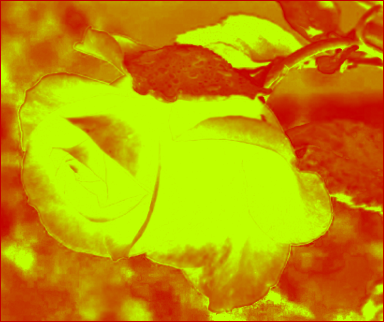

HSI Image after histogram equalisation


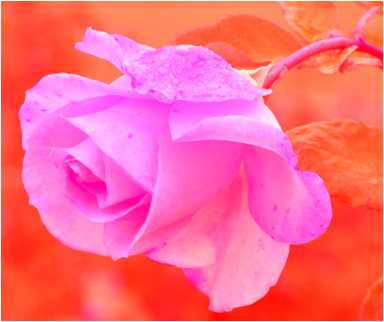

HSI converted to RGB


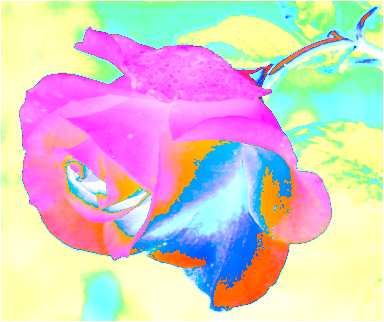

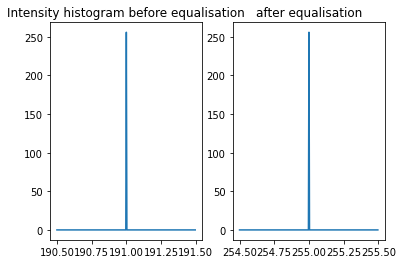

In [240]:
import cv2
from google.colab.patches import cv2_imshow
import math

def rgb2hsi (rgb_img):

  #Save the number of rows and columns of the original image
  row=np.shape (rgb_img) [0]
  col=np.shape (rgb_img) [1]
  #Copy the original image
  hsi_img=rgb_img.copy ()
  #Channel split the image
  b, g, r=cv2.split (rgb_img)
  #Normalize the channel to [0,1]
  [b, g, r]=[i/255.0 for i in ([b, g, r])]
  h=np.zeros ((row, col)) #define h channel
  i=(r + g + b)/3.0 #Calculate the i channel
  s=np.zeros ((row, col)) #define s channel
  for i in range (row):
    den=np.sqrt ((r [i] -g [i]) ** 2+ (r [i] -b [i]) * (g [i] -b [i]))
    thetha=np.arccos (0.5 * (r [i] -b [i] + r [i] -g [i])/den) #Calculate the angle
    h=np.zeros (col) #define temporary array
    #den>0 and g>= b element h is assigned thetha
    h [b [i]<= g [i]]=thetha [b [i]<= g [i]]
    #den>0 and the element h of g<= b is assigned thetha
    h [g [i]<b [i]]=2 * np.pi-thetha [g [i]<b [i]]
    #den<0's element h is assigned a value of 0
    h [den == 0]=0
    h [i]=h[i]/(2 * np.pi) #Assign to h channel after radian
  #Calculate s channel
  for i in range (row):
    min=[]
    #Find the minimum value of each group of rgb values
    for j in range (col):
      arr=[b [i] [j], g [i] [j], r [i] [j]]
      min.append (np.min (arr))
    min=np.array (min)
    #Calculate s channel
    s [i]=1-min * 3/(r [i] + b [i] + g [i])
    #i is a value of 0 directly assigned 0
    s [i] [r [i] + b [i] + g [i] == 0]=0
  #Expand to 255 for easy display,Generally h component is between [0,2pi] and s and i are between [0,1]
  hsi_img [:,:, 0]=h * 255
  hsi_img [:,:, 1]=s * 255
  hsi_img [:,:, 2]=i * 255
  return hsi_img
def  HSI2RGB (hsi_img) : 
    # The number of rows and columns to save the original image 
    row = np.shape(hsi_img)[ 0 ]
    col = np.shape(hsi_img)[ 1 ]
     #Copy the original image
    rgb_img = hsi_img.copy()
    #Channel splitting the image
    H,S,I = cv2.split(hsi_img)
    # Normalize the channel to [0,1] 
    [H,S,I] = [i/255.0  for i in ([H,S,I])]
    R,G,B = H,S,I
    for i in range(row):
        h = H[i]* 2 *np.pi
         #H is greater than or equal to 0 and less than 120 degrees when 
        a1 = h >= 0 
        a2 = h < 2 *np.pi/3 
        a = a1 & a2          #The flower of the first case Style index 
        tmp = np.cos(np.pi/3 -h)
        b = I[i] * ( 1 -S[i])
        r = I[i]*( 1 +S[i]*np.cos(h)/tmp)
        g = 3 *I[i]-(r*b)
        B[i][a] = b[a]
        R[i][a] = r[a]
        G[i][a] = g[a]
        #H is greater than or equal to 120 degrees and less than 240 degrees 
        a1 = h >= 2 *np.pi/3 
        a2 = h < 4 *np.pi/3 
        a = a1 & a2          #index of the second case
        tmp = np.cos(np.pi-h)
        r = I[i] * ( 1 -S[i])
        g = I[i]*( 1 +S[i]*np.cos(h- 2 *np.pi/3 )/tmp)
        b = 3 * I[i]-r-g
        R[i][a] = r[a]
        G[i][a] = g[a]
        B[i][a] = b[a]
        #H is greater than or equal to 240 degrees and less than 360 degrees 
        a1 = h >= 4 * np.pi/3 
        a2 = h < 2 * np.pi
        a = a1 & a2              
        #The fancy index of the third case tmp = np.cos( 5 * np.pi/3 -h)
        g = I[i] * ( 1 -S[i])
        b = I[i]*( 1 +S[i]*np.cos(h- 4 *np.pi/3 )/tmp)
        r = 3 * I[i]-g-b
        B[i][a] = b[a]
        G[i][a] = g[a]
        R[i][a] = r[a]
    rgb_img[:,:, 0 ] = B* 255 
    rgb_img[:,:, 1 ] = G* 255 
    rgb_img[:,:, 2 ] = R* 255 
    return rgb_img


image = cv2.imread('input1.PNG',cv2.IMREAD_COLOR)

m = image.shape[0]
n = image.shape[1]



hsi = rgb2hsi(image)

image = hsi


res = np.zeros([m, n,3])


b = []

for x in range(m):                    #Loop to get matrices of H,S,I values
  tempr = []
  tempg = []
  tempb = []
  for y in range(n):
    tempr.append(image[x,y,0])
    tempg.append(image[x,y,1])
    tempb.append(image[x,y,2])
  r.append(tempr)
  g.append(tempg)
  b.append(tempb)


    #Creating histograms of mattrices after flattening arrays

b_hist = np.histogram(np.array(b).flatten(), 256, density=True)

figure, axis = plt.subplots(1, 2)                          # creating a 1 x 2 subplot
axis[0].plot(b_hist[1][:-1],b_hist[0])                    #plotting intensity before equalisation
axis[0].set_title('Intensity histogram before equalisation')

                        #calculating cumulative sum

bcdf = b_hist[0].cumsum()

    #Normalisation(negative index gives last value of array i.e total cumulative sum)

bcdf = 255*bcdf/(bcdf[-1])

       #storing equalised values after interpolation between histogram and cdf

b_eq = np.interp(np.array(b).flatten(), b_hist[1][:-1], bcdf)

#reshaping array according to image dimensions

b_eq = b_eq.reshape((m,n))

b_eq_hist = np.histogram(np.array(b_eq).flatten(), 256, density=True) #creating intensity histogram after equalisation

axis[1].plot(b_eq_hist[1][:-1],b_eq_hist[0])   #plotting intensity histogram after equalisation
axis[1].set_title('after equalisation')
                     

for x in range(m):                                       #saving equalised values
  for y in range(n):
    res[x,y,0] = r[x][y]
    res[x,y,1] = g[x][y]
    res[x,y,2] = round(b_eq[x][y])

print("HSI Image before histogram equalisation")
cv2_imshow(image)
print("HSI Image after histogram equalisation")
cv2_imshow(res)

res = HSI2RGB(res)

print("HSI converted to RGB")
cv2_imshow(res)

##Question 2

###Image Thickening

Original Image


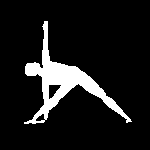

Hit and miss


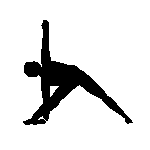

Thickening


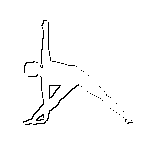

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/smcri/IVP2021_IIITA/main/ivp5_images/input3.bmp', 'input3.BMP')
image1 = Image.open('input3.BMP')
urllib.request.urlretrieve('https://raw.githubusercontent.com/smcri/IVP2021_IIITA/main/ivp5_images/input4.bmp', 'input4.BMP')
image2 = Image.open('input4.BMP')



res1 = PIL.Image.new(image1.mode, image1.size)
res2 = PIL.Image.new(image2.mode, image2.size)

imagenew = PIL.Image.new(image1.mode, image1.size)

stel = [[255,255,255],                   #defining structural element
        [255,255,255],
        [255,255,255]]

iter = [-1,0,1]

for x in range(image1.height):                 #All dark pixels are 0 and light pixels are 255
  for y in range(image1.width):
    if(image1.getpixel((y,x))<=0):
      imagenew.putpixel((y,x),255)
    else:
      imagenew.putpixel((y,x),0)

for x in range(image1.height):
  for y in range(image1.width):                       #iterating over all pixels and comparing pixels with structural element(Hit and miss)
    flag = 0
    for i in range(3):
      for j in range(3):
        curx = x + iter[i]
        cury = y + iter[i]

        if(curx<0 or curx>=imagenew.height):
          continue
        
        if(cury<0 or cury>=imagenew.width):
          continue
        
        if((imagenew.getpixel((cury,curx)) == stel[i][j])):
          flag = 1
        
      
    if(flag == 1):
      res1.putpixel((y,x),0)
    else:
      res1.putpixel((y,x),255)


print("Original Image")
display(image1)
print("Hit and miss")
display(res1)

for x in range(image1.height):                                          #Union operation
  for y in range(image1.width):
    res1.putpixel((y,x),imagenew.getpixel((y,x))|res1.getpixel((y,x)))

print("Thickening")
display(res1)

###Image skeleton

Original Image


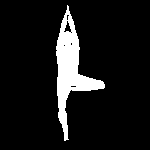

Skeleton Image


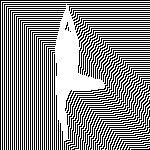

In [ ]:
iterr  = 1



for x in range(image2.height):                 #All dark pixels are 0 and light pixels are 255
   for y in range(image2.width):
    if(image2.getpixel((y,x))<=0):
      imagenew.putpixel((y,x),255)
    else:
      imagenew.putpixel((y,x),0)

stel = [[255,255,255],                   #defining structural element
          [255,255,255],
          [255,255,255]]

iter = [-1,0,1]

for itervar in range(iterr):                             #Iterating mutiple times for skeleton operator
  for x in range(image2.height):
    for y in range(image2.width):                       #iterating over all pixels and comparing pixels with structural element(Hit and miss)
      flag = 0
      for i in range(3):
        for j in range(3):
          curx = x + iter[i]
          cury = y + iter[i]

          if(curx<0 or curx>=imagenew.height):
            continue
        
          if(cury<0 or cury>=imagenew.width):
            continue
        
          if((imagenew.getpixel((cury,curx)) == stel[i][j])):
            flag = 1
        
      
      if(flag == 1):
        res2.putpixel((y,x),0)
      else:
        res2.putpixel((y,x),255)


  #print("Original Image")
  #display(image2)

  #print("Image after Hit and Miss operation")
  #display(res2)

  for x in range(image2.height):                 #Applying not operator
    for y in range(image2.width):
      if(res2.getpixel((y,x))==0):
        res2.putpixel((y,x),255)
      else:
        res2.putpixel((y,x),0)

  #print("Image after Not operation")
  #display(res2)

  for x in range(image2.height):                 #Applying not operator
    for y in range(image2.width):
      res2.putpixel((y,x),imagenew.getpixel((y,x))&res2.getpixel((y,x)))

  #print("Image after thinning")
  #display(res2)
  imagenew = res2


print("Original Image")
display(image2)
print("Skeleton Image")
display(res2)

##Question 3

Basic steps are as follows:  
1) Apply thresholding to image. If pixel is greater than 100, assign 255 else assign 0  
2)Apply laplacian filter on thresholded image for edge detection  
3) Get image negative of filtered image



Original image


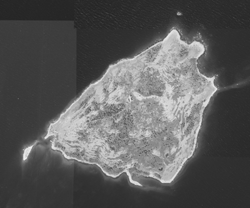

Image after thresholding


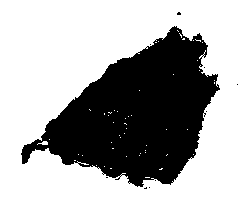

image after laplacian filter


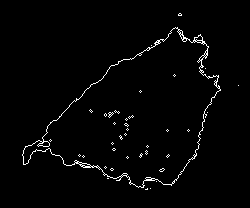

Image negative


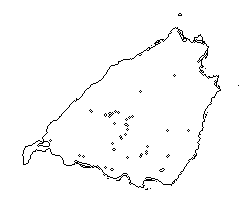

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


urllib.request.urlretrieve('https://raw.githubusercontent.com/smcri/IVP2021_IIITA/main/ivp5_images/input6.bmp', 'input6.bmp')
image = cv2.imread('input6.bmp',0)

print("Original image")
cv2_imshow(image)

m, n = image.shape





for i in range(m):              ##applying thresholding on image
  for j in range(n):
    if(image[i,j]<100):
      image[i,j] = 255
    else:
      image[i,j] = 0

print("Image after thresholding")
cv2_imshow(image)

img = np.zeros([m+1, n+1])    #creating padding array

for i in range(1, m+1):              #loop applying padding to image
    for j in range(1, n+1):
      if(i == 0 or j == 0 or i == m or j == n):
        img[i,j] = 0
      else:
        img[i,j] = image[i-1,j-1]               

mask = np.array([[0,1,0],[1,-4,1],[0,1,0]])          #laplacian filter matrix
img_new = np.zeros([m, n])

for i in range(1, m-1):                            #correlation with laplacian filter
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
#img_new = img_new.astype(np.uint8)

print("image after laplacian filter")
cv2_imshow(img_new)

for i in range(m):              #image negative
  for j in range(n):
    img_new[i,j] = 255 - img_new[i,j]

print("Image negative")
cv2_imshow(img_new)


##Question 4

Original image


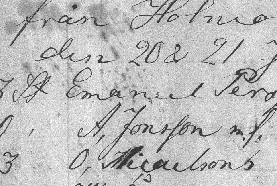

Image after thresholding


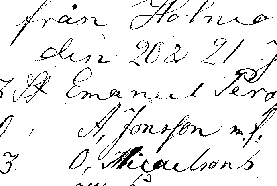

Image after adaptive thresholding


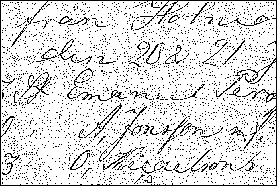

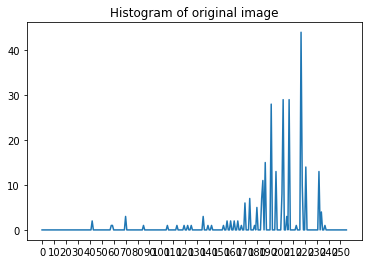

In [254]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


urllib.request.urlretrieve('https://raw.githubusercontent.com/smcri/IVP2021_IIITA/main/ivp5_images/input7.bmp', 'input7.bmp')


img_unp = cv2.imread('input7.bmp',0)  #importing image
m, n = img_unp.shape                  #taking dimensions

print("Original image")
cv2_imshow(img_unp)

histogram=cv2.calcHist(img_unp,[0],None,[256],[0,256])
plt.xticks(range(0,255,10))
plt.plot(histogram)
plt.title('Histogram of original image')



img = np.zeros([m+1, n+1])            #create blank array of zeroes

for i in range(1, m+1):                            #loop for padding
    for j in range(1, n+1):                     
      if(i == 0 or j == 0 or i == m or j == n):
        img[i,j] = 0
      else:
        img[i,j] = img_unp[i-1,j-1]
mask = np.ones([3, 3], dtype = int)                #creating averaging filter mask
mask = mask / 9

for i in range(m):              ##applying thresholding on image
  for j in range(n):
    if(img_unp[i,j]<100):
      img_unp[i,j] = 0
    else:
      img_unp[i,j] = 255

print("Image after thresholding")
cv2_imshow(img_unp)


img_new = np.zeros([m, n])                        #create result array and initialise with zeroes

for i in range(1, m-1):   
    for j in range(1, n-1):     #calculating average for each pixel's neighbours 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        if(img[i,j]>(temp-21)):            #if pixel is greater than average - C(Here C is 21 but can be manually adjested to get better results)
          img_new[i, j]= 255          #assign value of 255
        else:
          img_new[i,j] = 0            #otherwise assign 0

print("Image after adaptive thresholding")
cv2_imshow(img_new)

Clearly, using global or adaptive thresholding makes the text more readable. In this case Global thresholding is slightly better than adaptive thresholding. Maybe Laplacian filter can be used to improve the quality of image. Also, In case of adaptive thresholding where thresholding is done on the basis of mean - C wheare mean is the mean of neighbouring pixels, the value of C can be adjusted to increase quality of image.

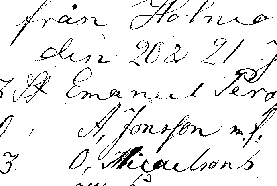

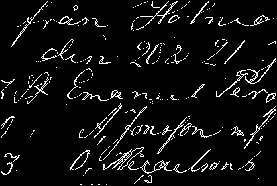

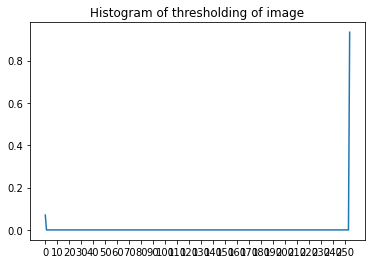

In [253]:

histogram=np.histogram(np.array(img_unp).flatten(), 256, density=True)
plt.xticks(range(0,255,10))
plt.plot(histogram[1][:-1],histogram[0])
plt.title('Histogram of thresholding of image')


m, n = img_unp.shape
cv2_imshow(img_unp)

img = np.zeros([m+1, n+1])              #creating empty array for padding image

for i in range(1, m+1):                    # padding image with zeroes
    for j in range(1, n+1):
      if(i == 0 or j == 0 or i == m or j == n):
        img[i,j] = 0
      else:
        img[i,j] = img_unp[i-1,j-1]

mask = np.array([[0,1,0],[1,-4,1],[0,1,0]])             #laplacian filter matrix
img_new = np.zeros([m, n])                              #creating new empty image

for i in range(1, m-1):
    for j in range(1, n-1):                        #correlation of image with laplacian matrix
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp

#img_new = img_new.astype(np.uint8)
cv2_imshow(img_new)

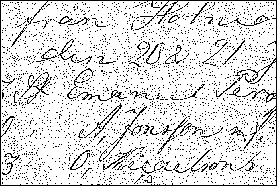

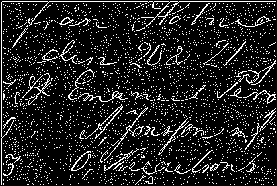

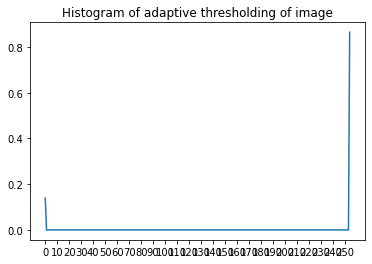

In [255]:
img_unp = img_new

histogram=np.histogram(np.array(img_unp).flatten(), 256, density=True)
plt.xticks(range(0,255,10))
plt.plot(histogram[1][:-1],histogram[0])
plt.title('Histogram of adaptive thresholding of image')

m, n = img_unp.shape
cv2_imshow(img_unp)

img = np.zeros([m+1, n+1])

for i in range(1, m+1):
    for j in range(1, n+1):
      if(i == 0 or j == 0 or i == m or j == n):
        img[i,j] = 0
      else:
        img[i,j] = img_unp[i-1,j-1]

mask = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img_new = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp

#img_new = img_new.astype(np.uint8)
cv2_imshow(img_new)
